In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import stumpy
plt.rcParams.update({'font.size': 20})

# Scotland ocean data

In [3]:
df = pd.read_table('./datasets/Scotland_metocean_removed.csv', delimiter = ',')
df

Year  Month  Day  Hour    Hs (m)  v10 (m/s)
0      2008      1    1     0  3.446098   6.504866
1      2008      1    1     6  3.337338   7.705570
2      2008      1    1    12  3.195431   7.402196
3      2008      1    1    18  2.971436   6.317548
4      2008      1    2     0  3.067249   7.646887
...     ...    ...  ...   ...       ...        ...
14595  2017     12   30    18  4.619158  10.236058
14596  2017     12   31     0  4.509621   7.472284
14597  2017     12   31     6  3.979025   6.199845
14598  2017     12   31    12  3.666209  11.561856
14599  2017     12   31    18  3.298495   7.788988

[14600 rows x 6 columns]

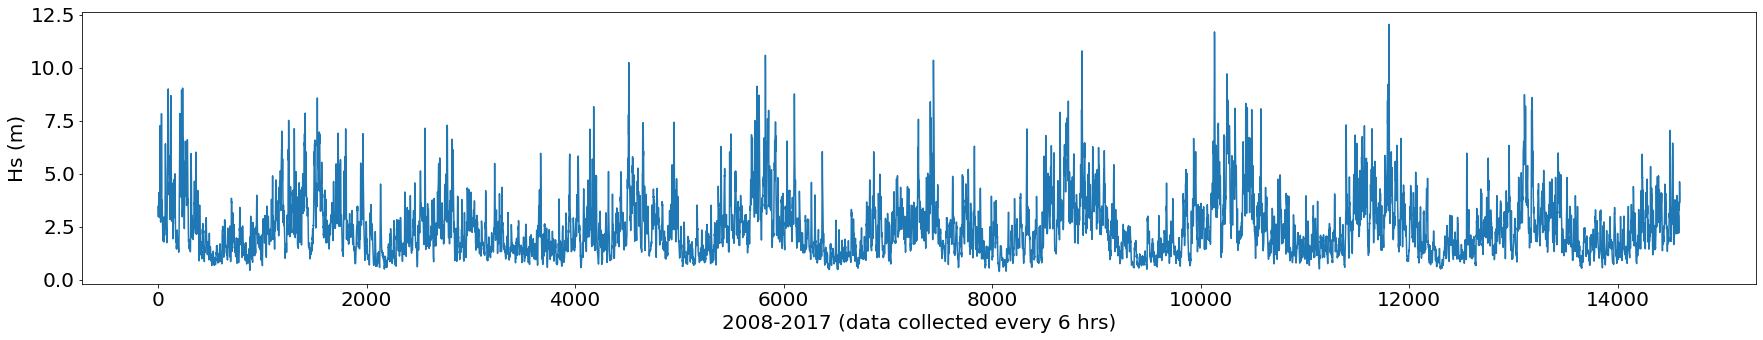

In [4]:
plt.figure(figsize=[30,5])
plt.plot(df.iloc[0:14599,4])
plt.ylabel('Hs (m)')
plt.xlabel('2008-2017 (data collected every 6 hrs)')
plt.show()

# One Week Window Size, Hs Motifs


Motif Locations: 291 , 182
Year Start and Year End: 0 , 1459


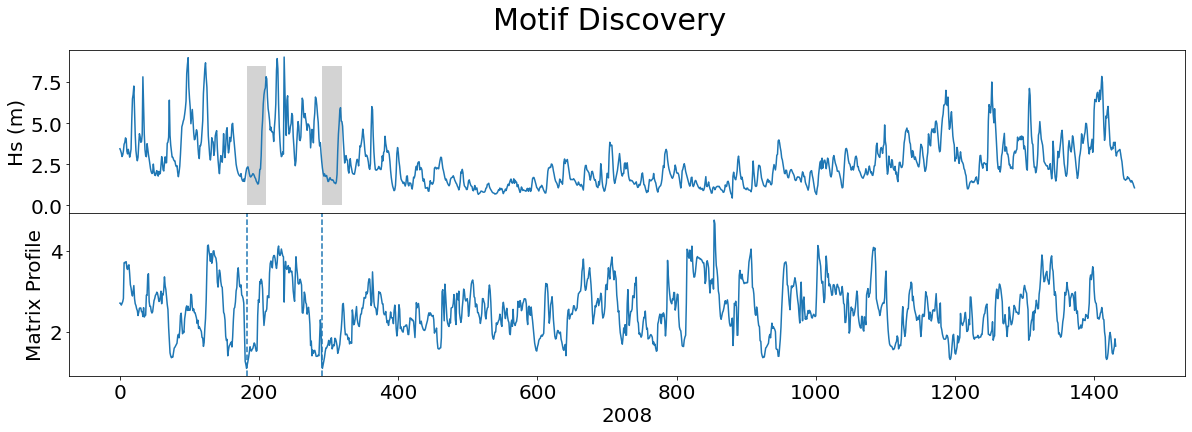

Motif Locations: 2132 , 2872
Year Start and Year End: 1460 , 2919


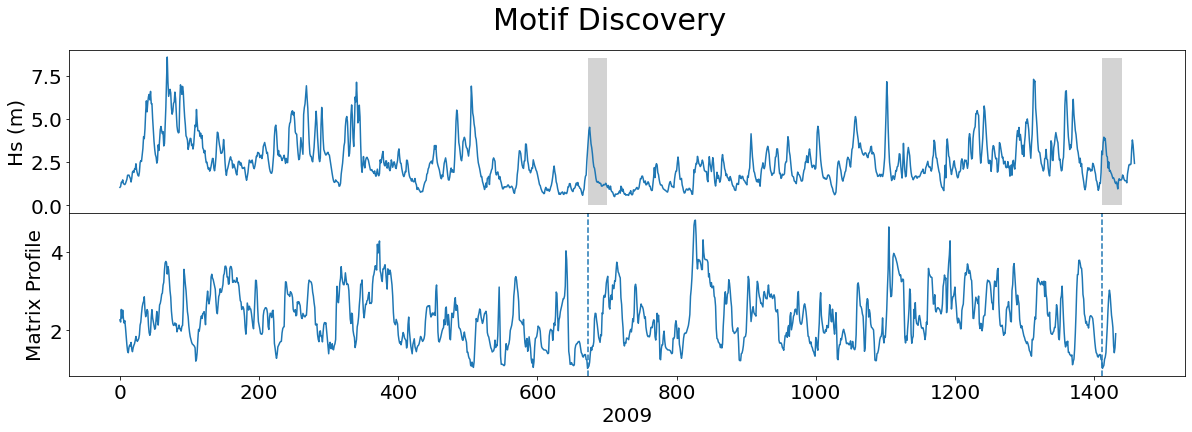

Motif Locations: 4320 , 3948
Year Start and Year End: 2920 , 4379


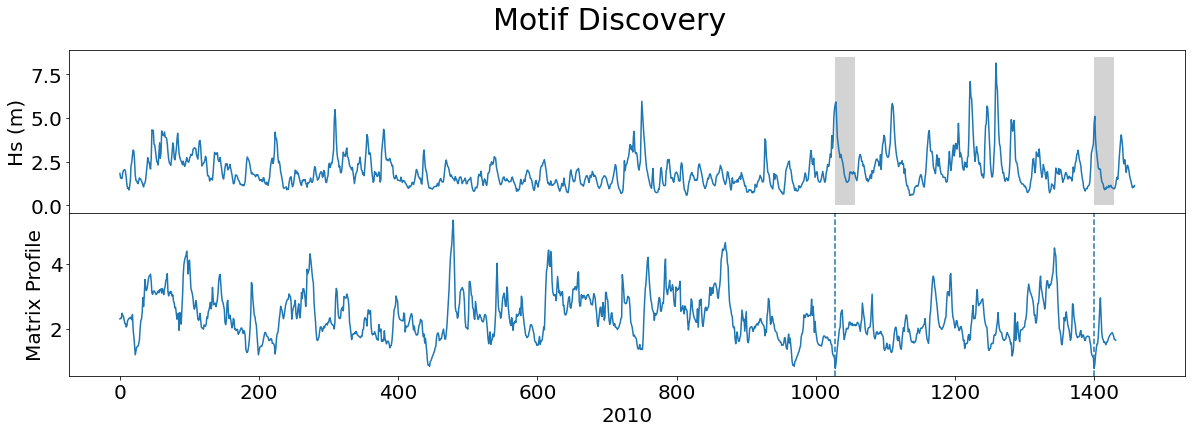

Motif Locations: 4623 , 5510
Year Start and Year End: 4380 , 5839


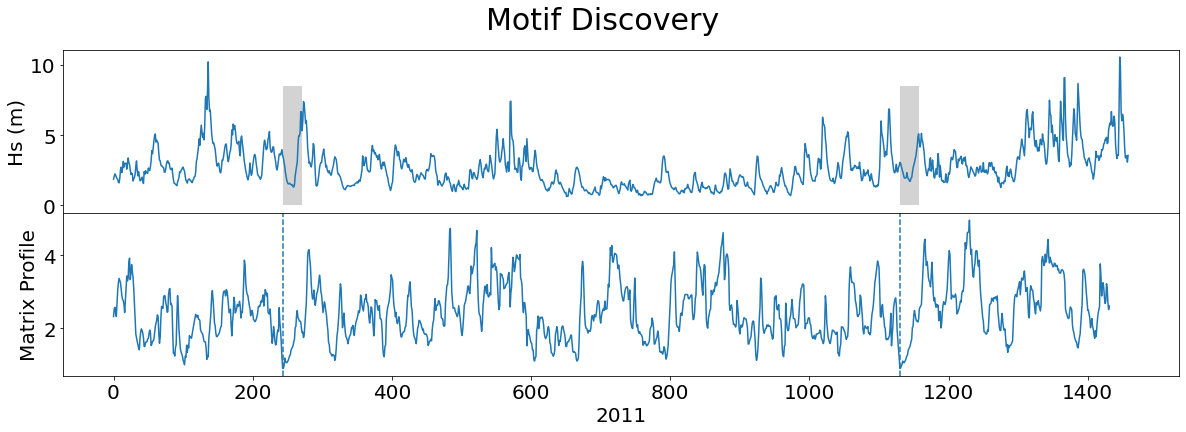

Motif Locations: 6104 , 6374
Year Start and Year End: 5840 , 7299


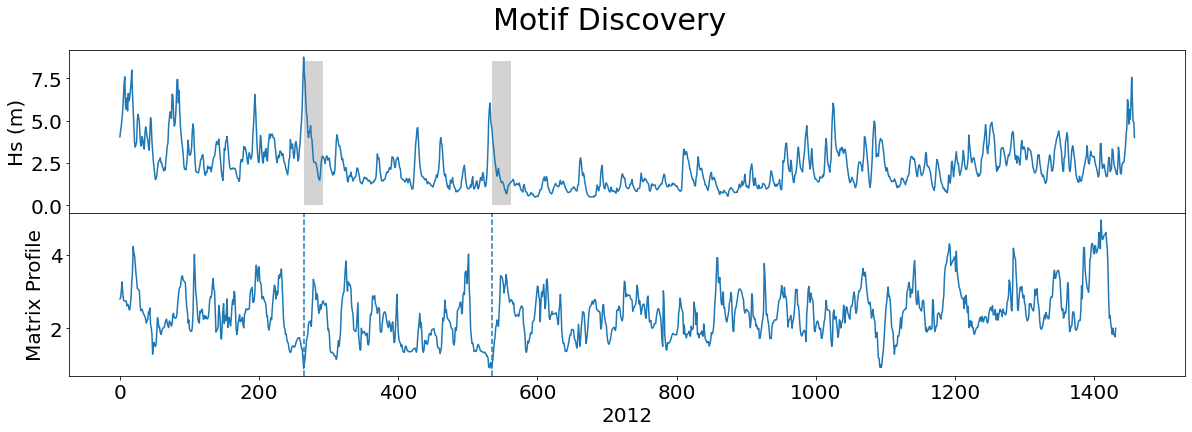

Motif Locations: 8590 , 8423
Year Start and Year End: 7300 , 8759


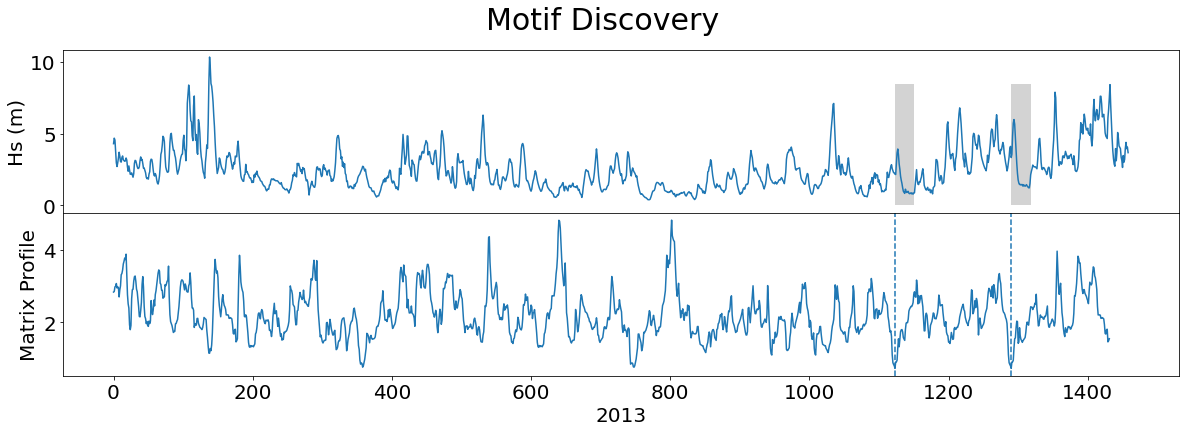

Motif Locations: 9674 , 9736
Year Start and Year End: 8760 , 10219


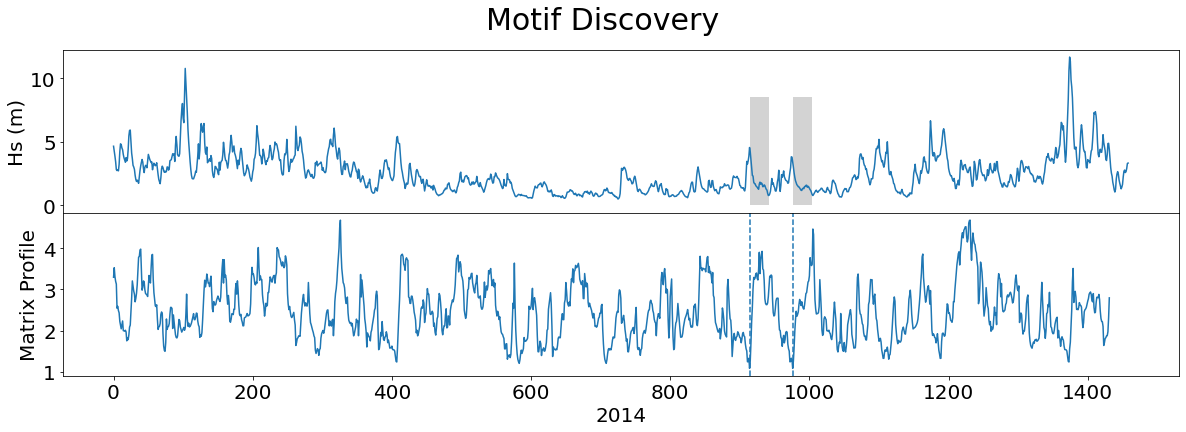

Motif Locations: 10727 , 10876
Year Start and Year End: 10220 , 11679


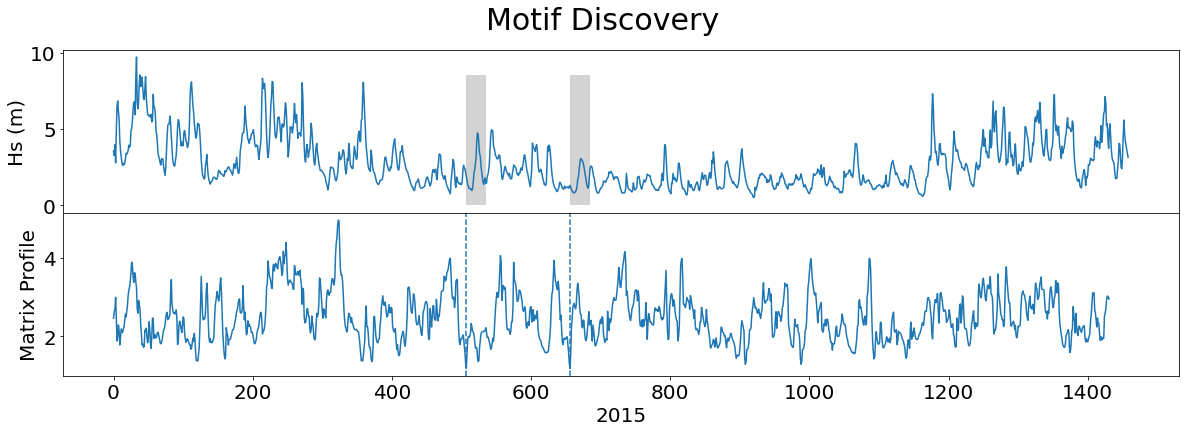

Motif Locations: 13010 , 12071
Year Start and Year End: 11680 , 13139


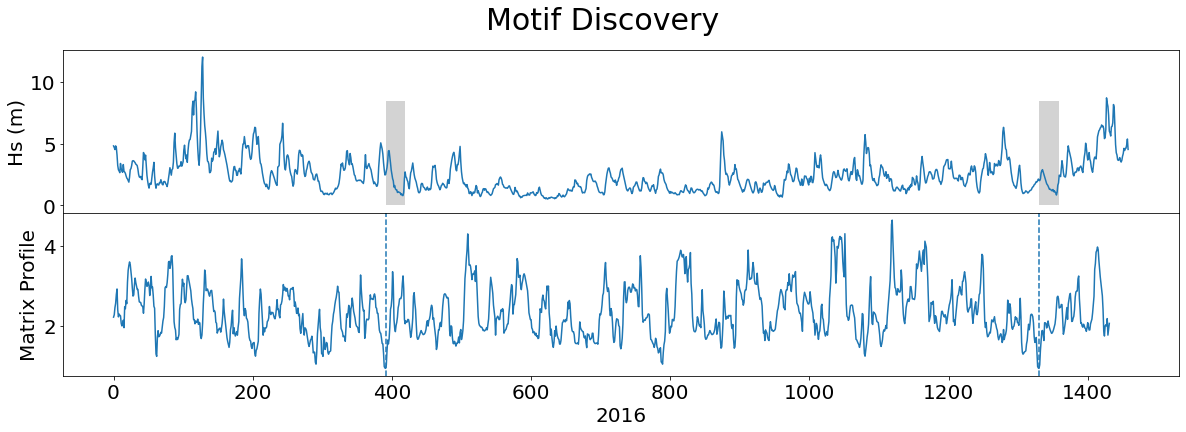

Motif Locations: 14528 , 13513
Year Start and Year End: 13140 , 14599


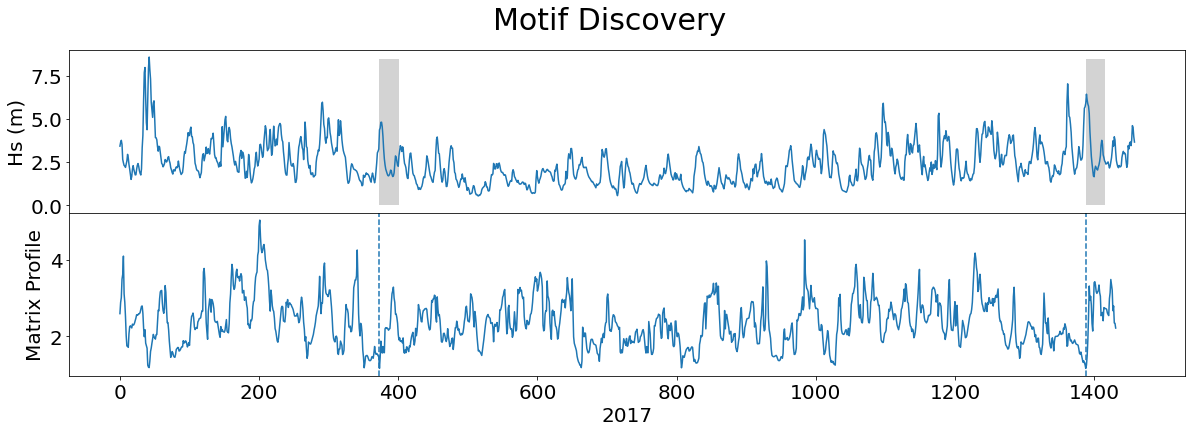

In [5]:
m = 28 
for i in range(10): 
    YS = i*1460
    YE = 1459+(i*1460)
    Y = 2008+i
    mp = stumpy.stump(df.iloc[YS:YE,4],m) 
    motif_idx = np.argsort(mp[:,0])[0] 
    nearest_neighbor_idx = mp[motif_idx, 1] + YS
    motif_idx = motif_idx + YS
    print('Motif Locations:',motif_idx,',', nearest_neighbor_idx)
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [20, 6])
    plt.suptitle('Motif Discovery', fontsize='30')
    axs[0].plot(df.iloc[YS:YE,4].values)
    axs[0].set_ylabel('Hs (m)', fontsize='20')
    rect = Rectangle((motif_idx-YS, 0), m, 8.5, facecolor='lightgrey')
    axs[0].add_patch(rect)
    rect = Rectangle((nearest_neighbor_idx-YS, 0), m, 8.5, facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel(str(Y), fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=motif_idx-YS, linestyle="dashed")
    axs[1].axvline(x=nearest_neighbor_idx-YS, linestyle="dashed")
    axs[1].plot(mp[0:1459, 0])
    print('Year Start and Year End:',YS,',',YE)
    if i == 0:
        plt.savefig('images/Hs_Motif_1week.png',dpi=300)
    plt.show()

# One Day Window Size, Hs Motifs

Motif Locations: 1196 , 767
Year Start and Year End: 0 , 1459


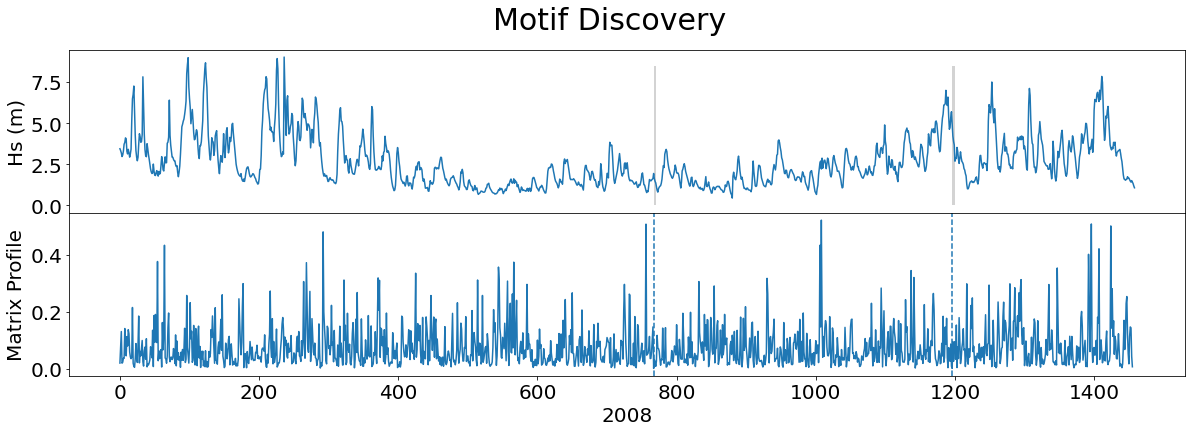

Motif Locations: 1804 , 2371
Year Start and Year End: 1460 , 2919


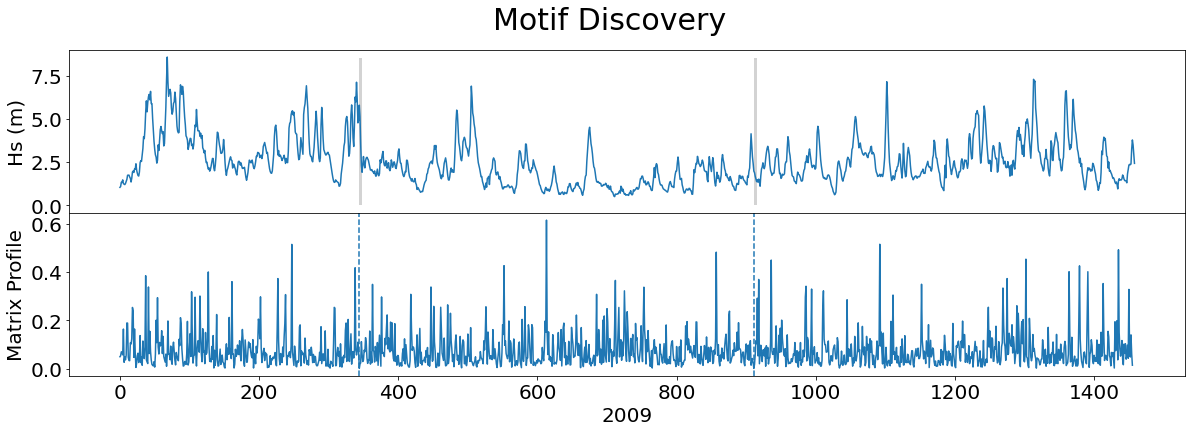

Motif Locations: 3865 , 4181
Year Start and Year End: 2920 , 4379


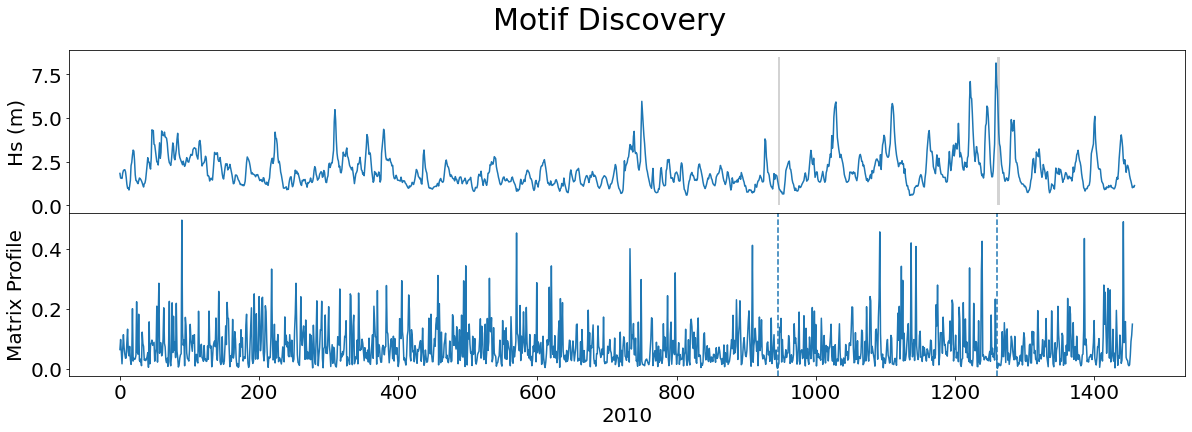

Motif Locations: 4382 , 5190
Year Start and Year End: 4380 , 5839


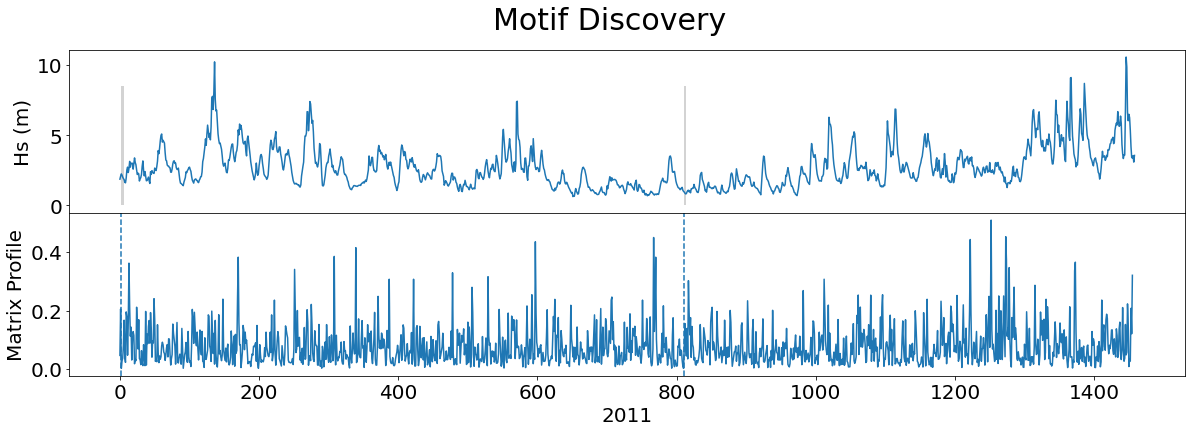

Motif Locations: 6296 , 5935
Year Start and Year End: 5840 , 7299


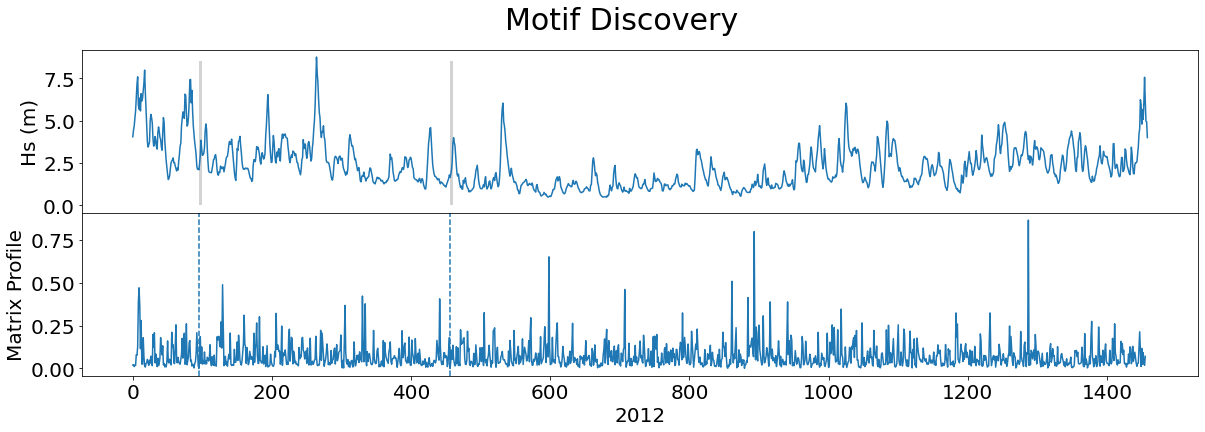

Motif Locations: 7907 , 7480
Year Start and Year End: 7300 , 8759


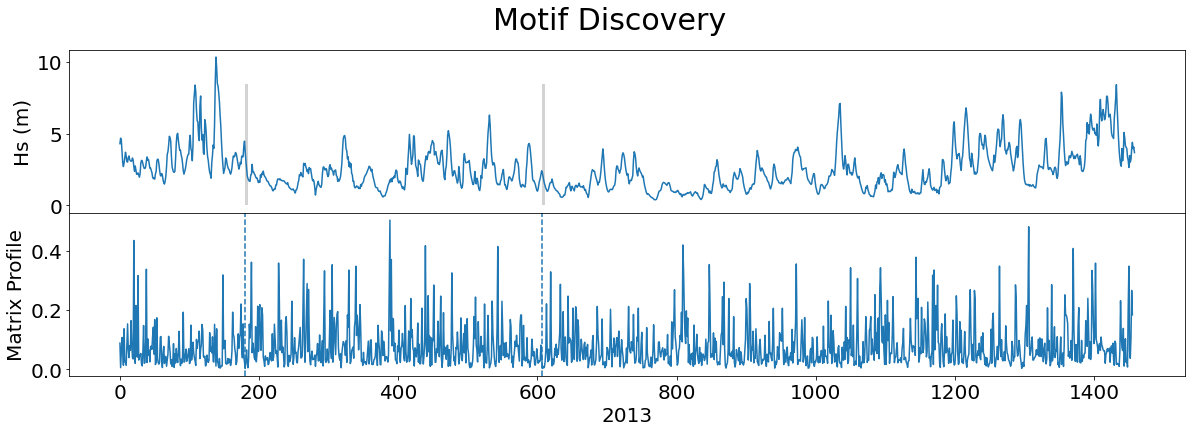

Motif Locations: 9837 , 9000
Year Start and Year End: 8760 , 10219


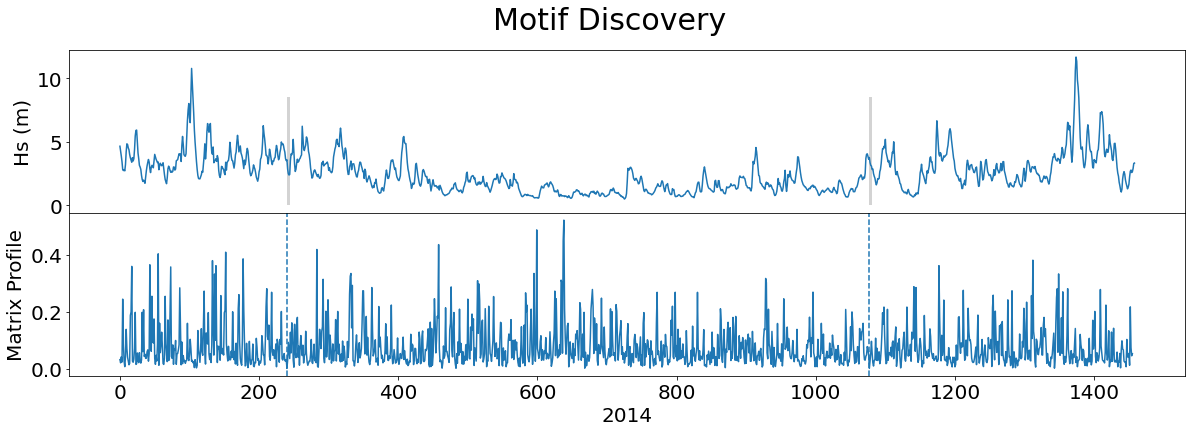

Motif Locations: 10290 , 11185
Year Start and Year End: 10220 , 11679


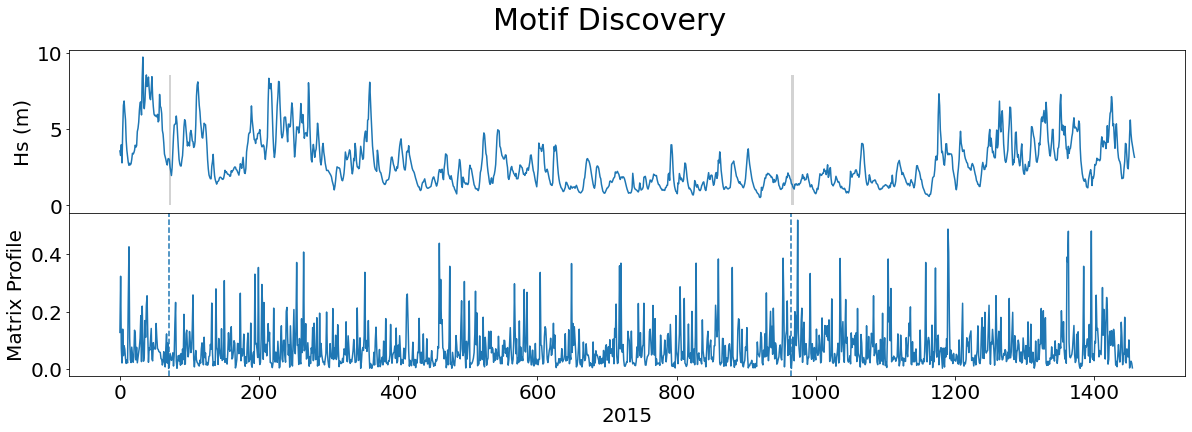

Motif Locations: 13113 , 11823
Year Start and Year End: 11680 , 13139


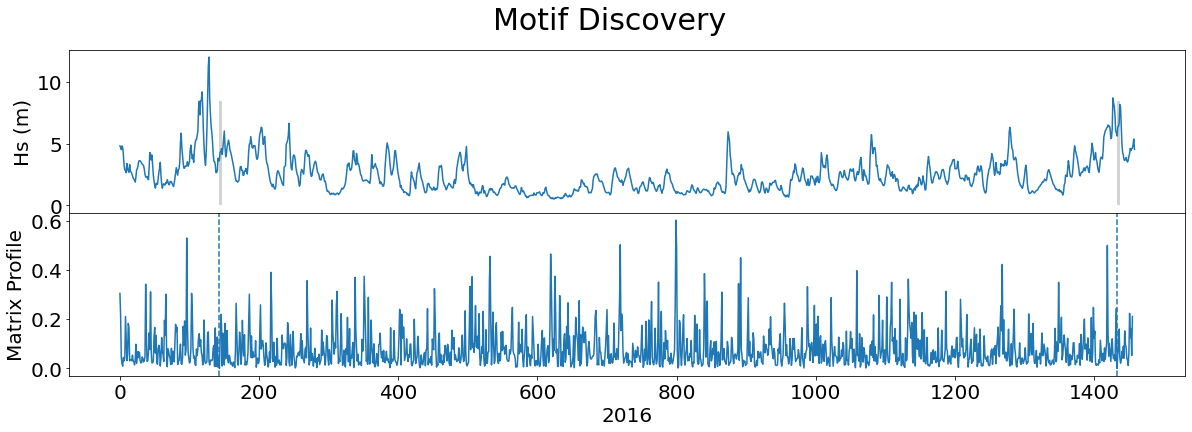

Motif Locations: 13497 , 14401
Year Start and Year End: 13140 , 14599


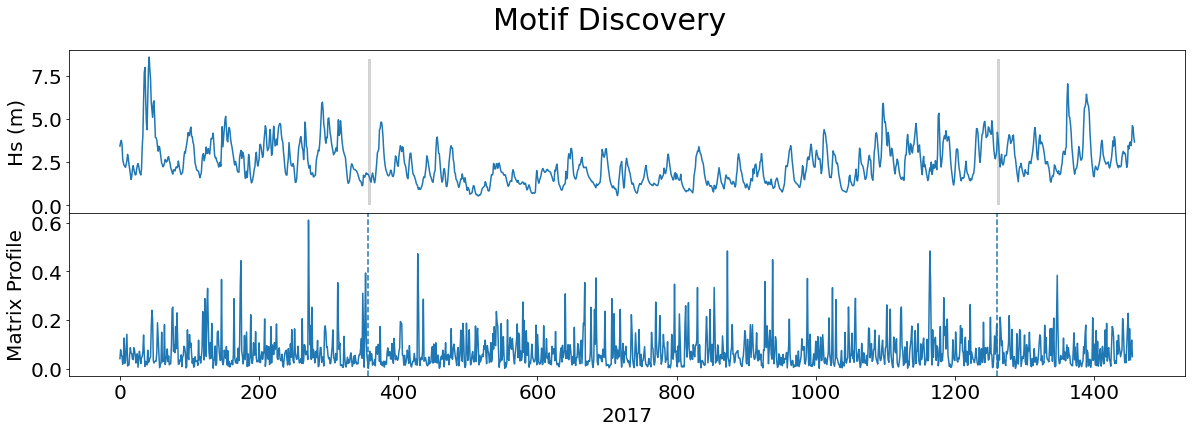

In [6]:
m = 4
for i in range(10): 
    YS = i*1460
    YE = 1459+(i*1460)
    Y = 2008+i
    mp = stumpy.stump(df.iloc[YS:YE,4],m) 
    motif_idx = np.argsort(mp[:,0])[0] 
    nearest_neighbor_idx = mp[motif_idx, 1] + YS
    motif_idx = motif_idx + YS
    print('Motif Locations:',motif_idx,',', nearest_neighbor_idx)
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [20, 6])
    plt.suptitle('Motif Discovery', fontsize='30')
    axs[0].plot(df.iloc[YS:YE,4].values)
    axs[0].set_ylabel('Hs (m)', fontsize='20')
    rect = Rectangle((motif_idx-YS, 0), m, 8.5, facecolor='lightgrey')
    axs[0].add_patch(rect)
    rect = Rectangle((nearest_neighbor_idx-YS, 0), m, 8.5, facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel(str(Y), fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=motif_idx-YS, linestyle="dashed")
    axs[1].axvline(x=nearest_neighbor_idx-YS, linestyle="dashed")
    axs[1].plot(mp[0:1459, 0])
    print('Year Start and Year End:',YS,',',YE)
    if i == 0:
        plt.savefig('images/Hs_Motif_1day.png',dpi=300)
    plt.show()

# One Week Window Size, v10 Motifs

Motif Locations: 181 , 293
Year Start and Year End: 0 , 1459


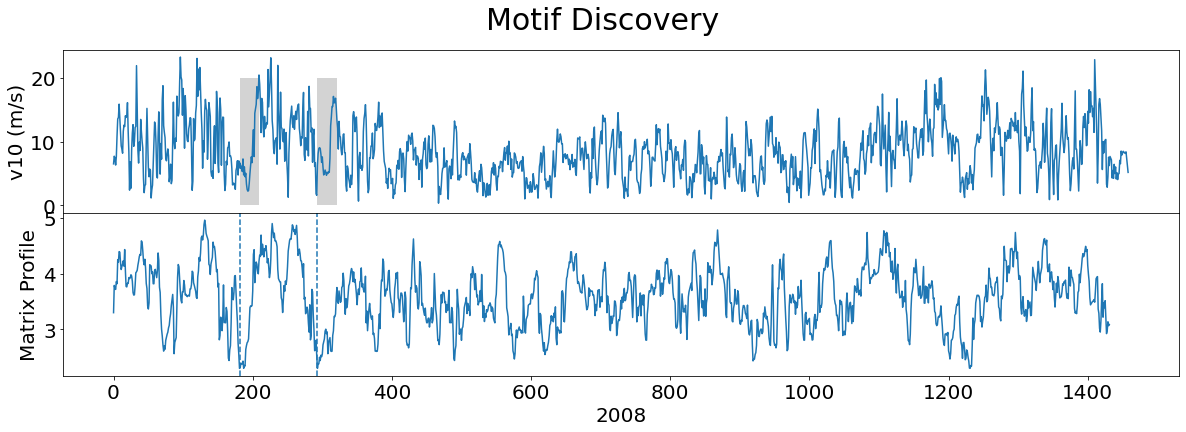

Motif Locations: 2237 , 2059
Year Start and Year End: 1460 , 2919


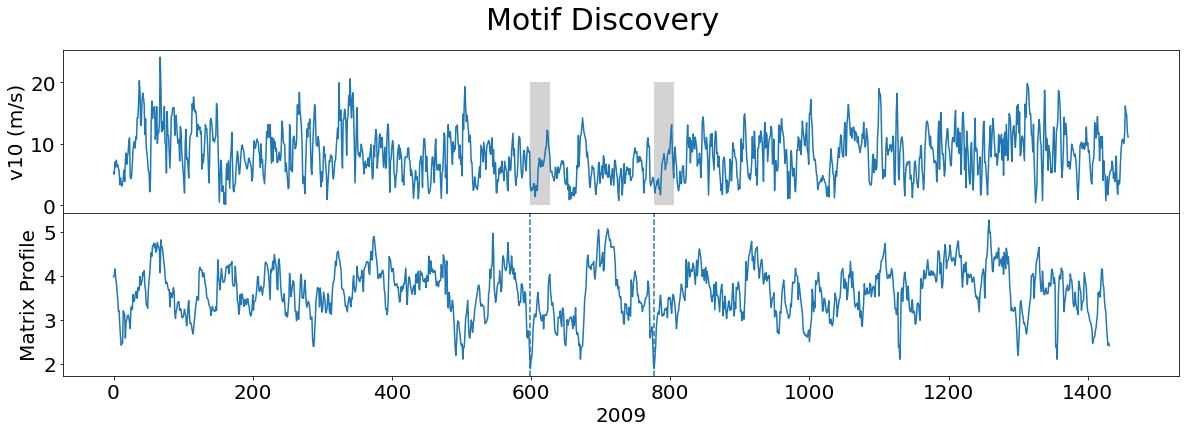

Motif Locations: 2945 , 3123
Year Start and Year End: 2920 , 4379


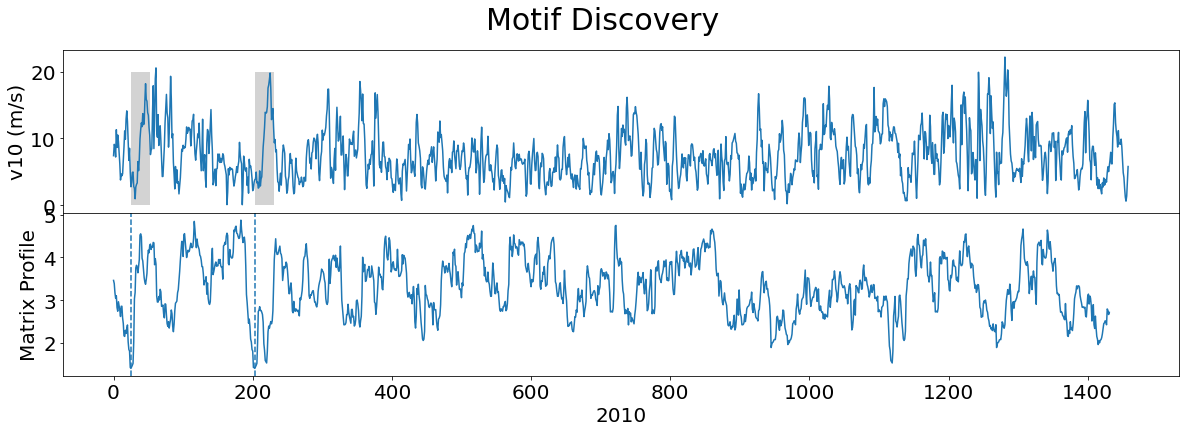

Motif Locations: 5168 , 4435
Year Start and Year End: 4380 , 5839


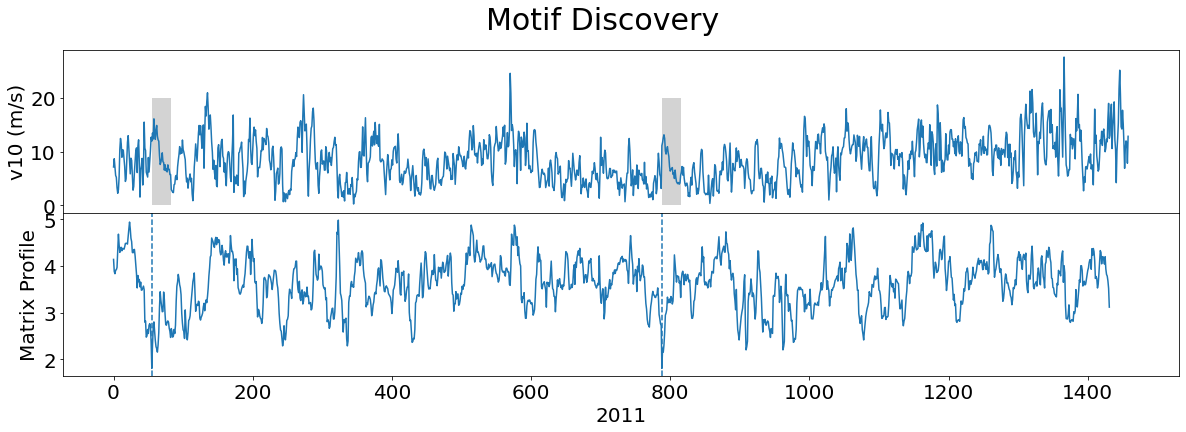

Motif Locations: 6625 , 6477
Year Start and Year End: 5840 , 7299


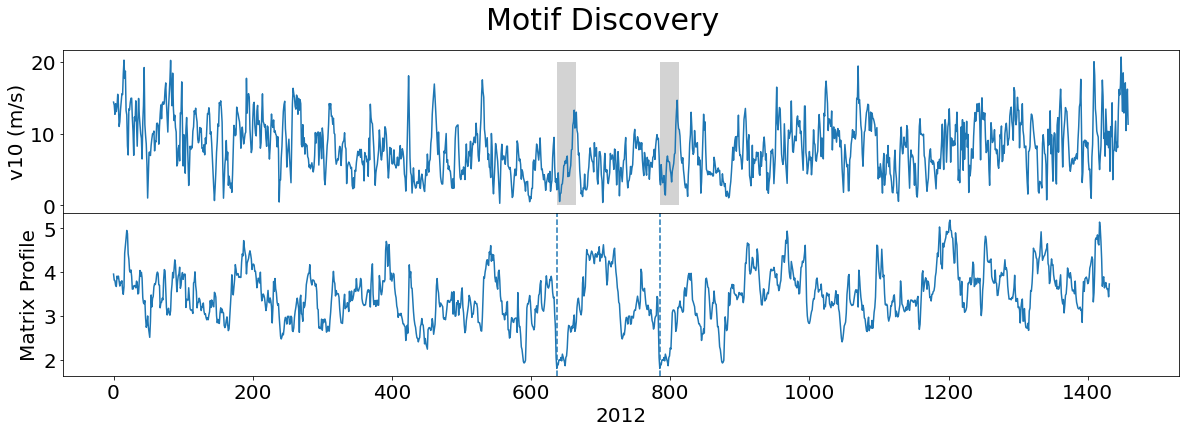

Motif Locations: 7648 , 7492
Year Start and Year End: 7300 , 8759


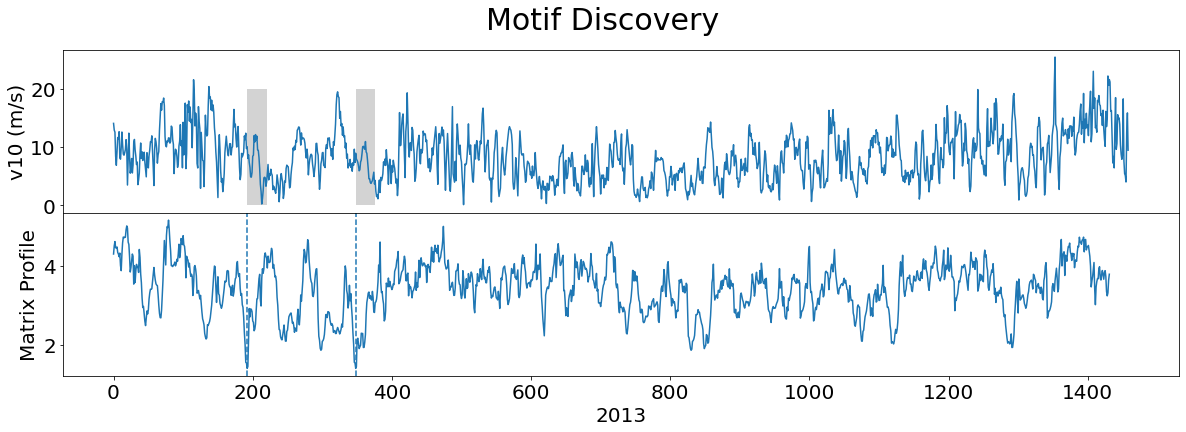

Motif Locations: 9329 , 9672
Year Start and Year End: 8760 , 10219


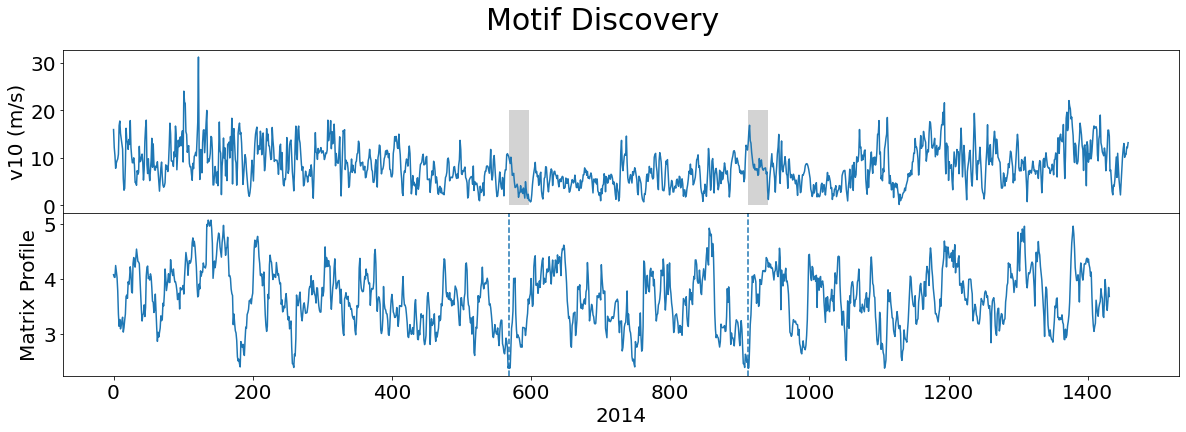

Motif Locations: 11366 , 10987
Year Start and Year End: 10220 , 11679


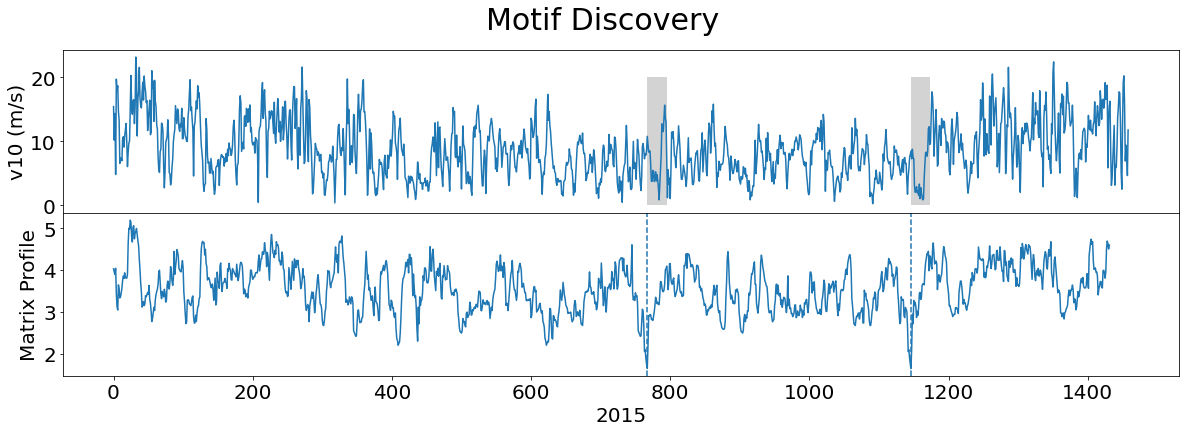

Motif Locations: 11825 , 12233
Year Start and Year End: 11680 , 13139


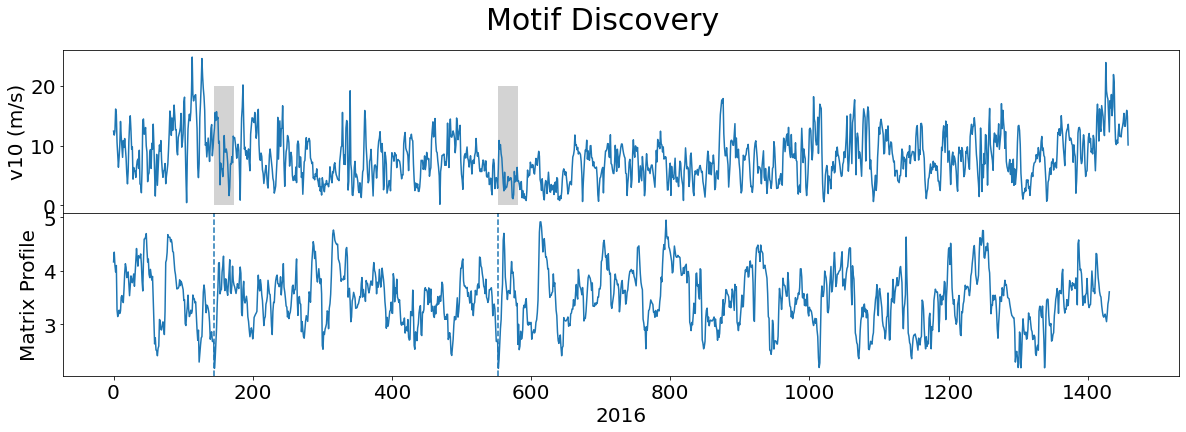

Motif Locations: 14489 , 13229
Year Start and Year End: 13140 , 14599


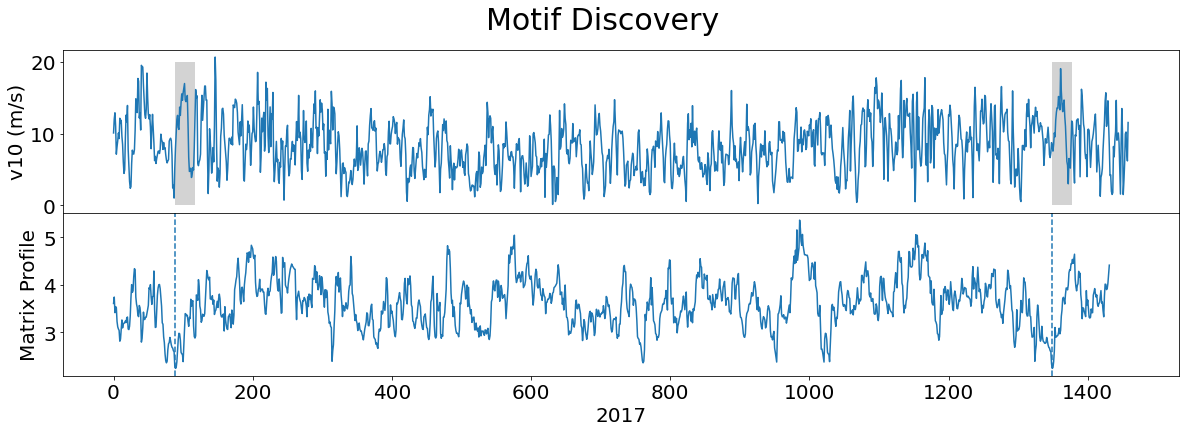

In [7]:
m = 28 
for i in range(10): 
    YS = i*1460
    YE = 1459+(i*1460)
    Y = 2008+i
    mp = stumpy.stump(df.iloc[YS:YE,5],m) 
    motif_idx = np.argsort(mp[:,0])[0] 
    nearest_neighbor_idx = mp[motif_idx, 1] + YS
    motif_idx = motif_idx + YS
    print('Motif Locations:',motif_idx,',', nearest_neighbor_idx)
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [20, 6])
    plt.suptitle('Motif Discovery', fontsize='30')
    axs[0].plot(df.iloc[YS:YE,5].values)
    axs[0].set_ylabel('v10 (m/s)', fontsize='20')
    rect = Rectangle((motif_idx-YS, 0), m, 20, facecolor='lightgrey')
    axs[0].add_patch(rect)
    rect = Rectangle((nearest_neighbor_idx-YS, 0), m, 20, facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel(str(Y), fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=motif_idx-YS, linestyle="dashed")
    axs[1].axvline(x=nearest_neighbor_idx-YS, linestyle="dashed")
    axs[1].plot(mp[0:1459, 0])
    print('Year Start and Year End:',YS,',',YE)
    if i == 0:
        plt.savefig('images/V10_Motif_1week.png',dpi=300)
    plt.show()

# One Day Window Size, v10 Motifs

Motif Locations: 366 , 959
Year Start and Year End: 0 , 1459


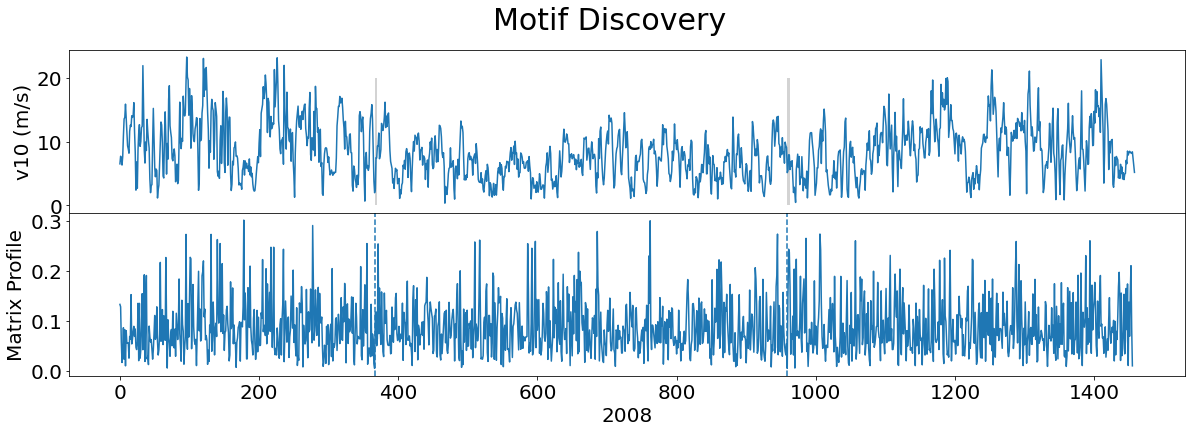

Motif Locations: 1705 , 2211
Year Start and Year End: 1460 , 2919


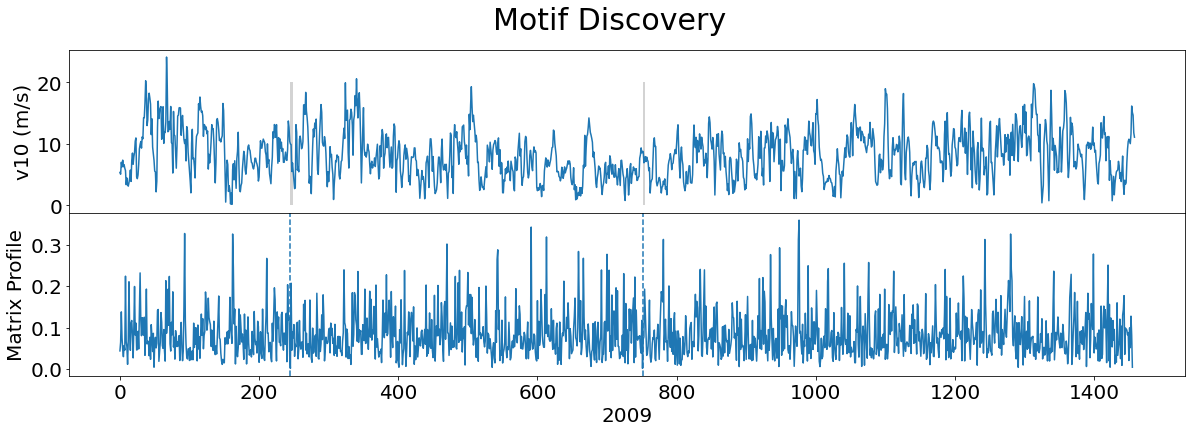

Motif Locations: 3132 , 2932
Year Start and Year End: 2920 , 4379


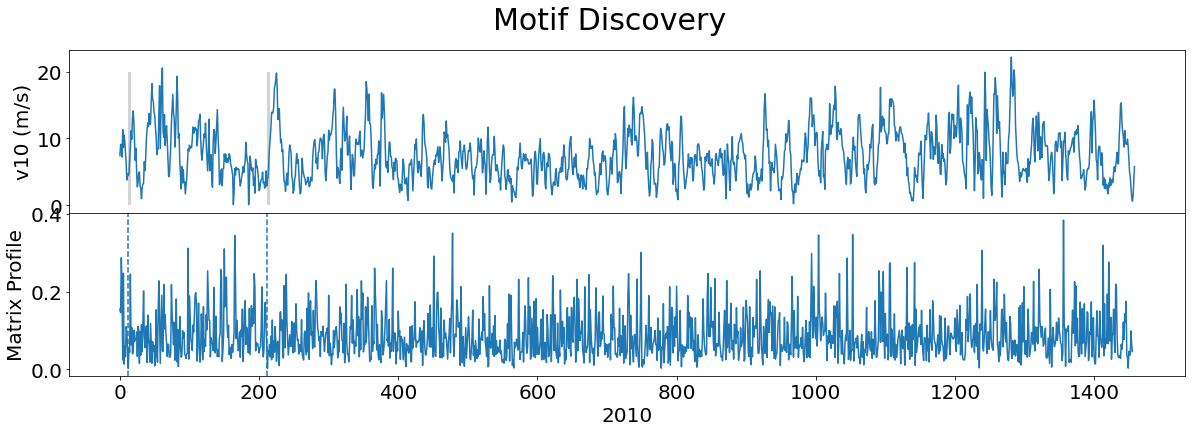

Motif Locations: 4944 , 5316
Year Start and Year End: 4380 , 5839


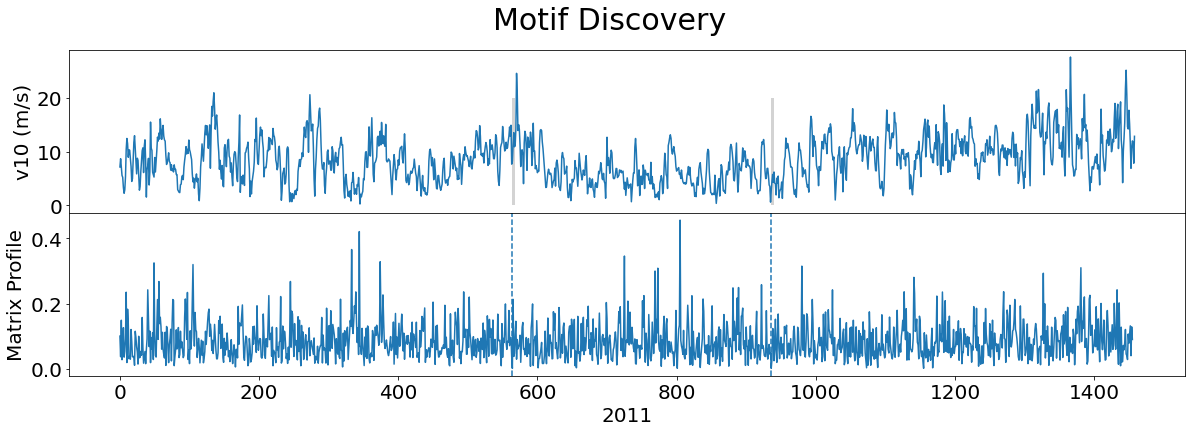

Motif Locations: 7276 , 5895
Year Start and Year End: 5840 , 7299


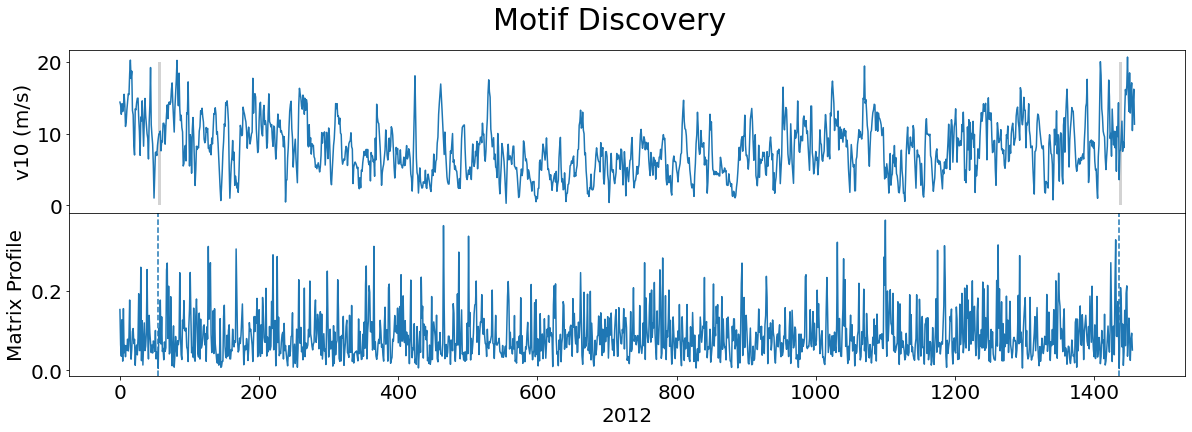

Motif Locations: 8370 , 7992
Year Start and Year End: 7300 , 8759


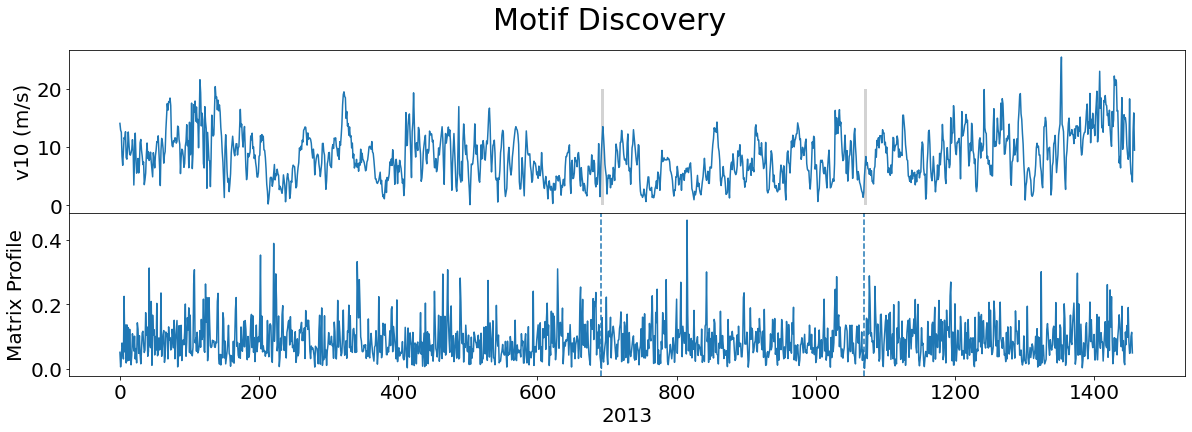

Motif Locations: 9108 , 9011
Year Start and Year End: 8760 , 10219


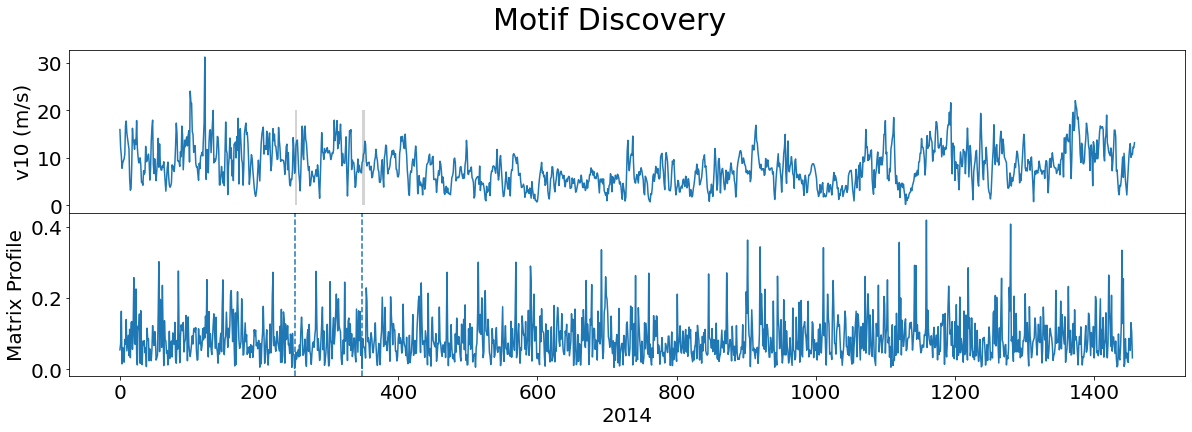

Motif Locations: 11575 , 11143
Year Start and Year End: 10220 , 11679


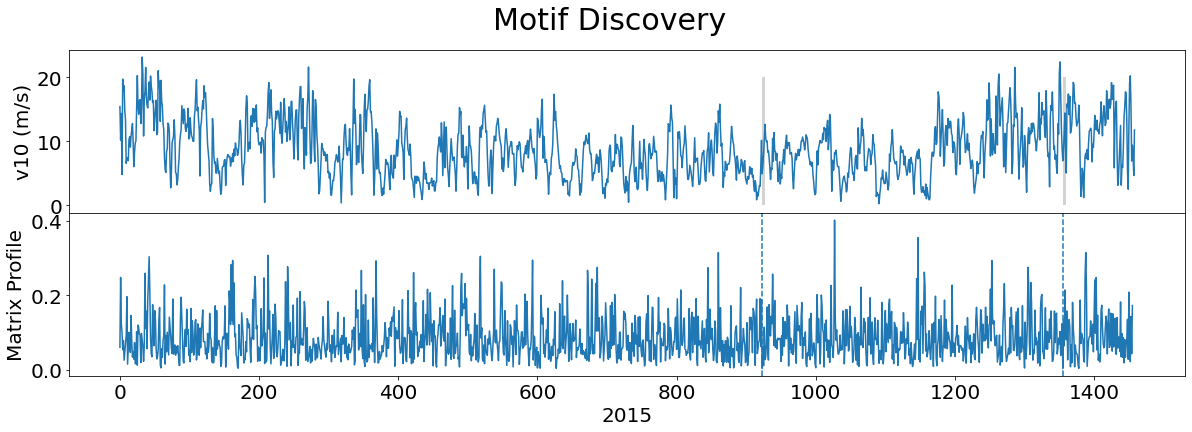

Motif Locations: 13022 , 12378
Year Start and Year End: 11680 , 13139


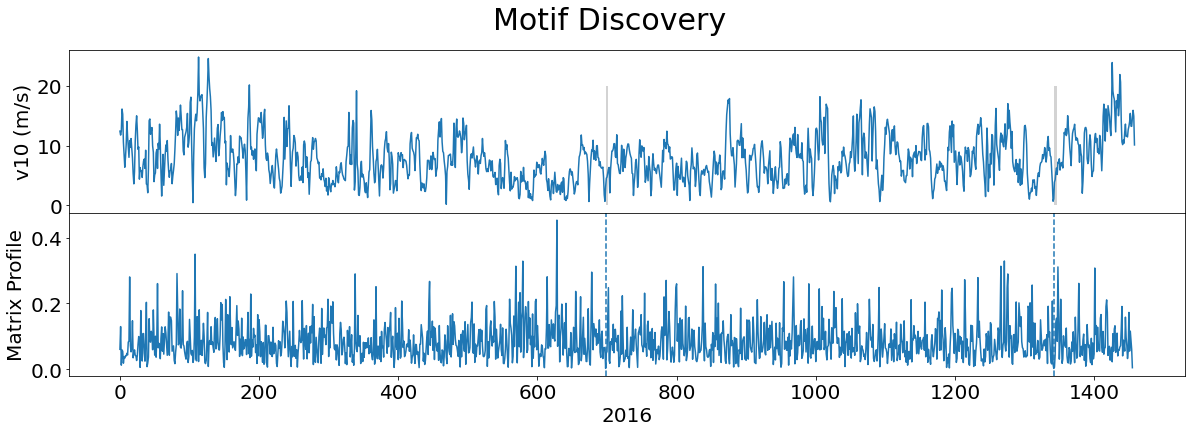

Motif Locations: 14047 , 13482
Year Start and Year End: 13140 , 14599


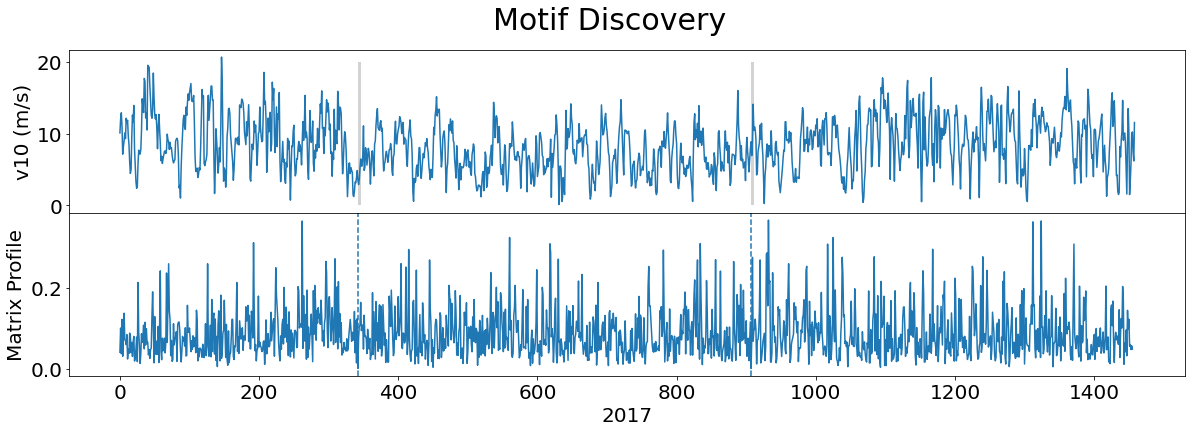

In [8]:
m = 4 
for i in range(10): 
    YS = i*1460
    YE = 1459+(i*1460)
    Y = 2008+i
    mp = stumpy.stump(df.iloc[YS:YE,5],m) 
    motif_idx = np.argsort(mp[:,0])[0] 
    nearest_neighbor_idx = mp[motif_idx, 1] + YS
    motif_idx = motif_idx + YS
    print('Motif Locations:',motif_idx,',', nearest_neighbor_idx)
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [20, 6])
    plt.suptitle('Motif Discovery', fontsize='30')
    axs[0].plot(df.iloc[YS:YE,5].values)
    axs[0].set_ylabel('v10 (m/s)', fontsize='20')
    rect = Rectangle((motif_idx-YS, 0), m, 20, facecolor='lightgrey')
    axs[0].add_patch(rect)
    rect = Rectangle((nearest_neighbor_idx-YS, 0), m, 20, facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel(str(Y), fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=motif_idx-YS, linestyle="dashed")
    axs[1].axvline(x=nearest_neighbor_idx-YS, linestyle="dashed")
    axs[1].plot(mp[0:1459, 0])
    print('Year Start and Year End:',YS,',',YE)
    if i == 0:
        plt.savefig('images/V10_Motif_1day.png',dpi=300)
    plt.show()